#LLMs and Big-O Notation:
Made by: Wilfredo Aaron Sosa Ramos (AI Lab Manager at RealityAI Labs)

Big-O dependency: https://github.com/pberkes/big_O

In [1]:
!pip install -q langchain langchain_core langchain_community langchain_google_genai big-o

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.1 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

In [6]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_google_genai import ChatGoogleGenerativeAI

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert algorithm builder. Please, return just the Python code for the required algorithm",
        ),
        ("human", "{algorithm}"),
    ]
)

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp",temperature=0)

runnable = (
    {"algorithm": RunnablePassthrough()} | prompt | model | StrOutputParser()
)

algorithm = runnable.invoke("Quicksort algorithm in Python")

In [9]:
algorithm

'```python\ndef quicksort(arr):\n    if len(arr) <= 1:\n        return arr\n    pivot = arr[len(arr) // 2]\n    left = [x for x in arr if x < pivot]\n    middle = [x for x in arr if x == pivot]\n    right = [x for x in arr if x > pivot]\n    return quicksort(left) + middle + quicksort(right)\n```\n'

In [17]:
formated_algorithm = algorithm.replace('```python','').replace('```','')

In [18]:
formated_algorithm

'\ndef quicksort(arr):\n    if len(arr) <= 1:\n        return arr\n    pivot = arr[len(arr) // 2]\n    left = [x for x in arr if x < pivot]\n    middle = [x for x in arr if x == pivot]\n    right = [x for x in arr if x > pivot]\n    return quicksort(left) + middle + quicksort(right)\n\n'

In [19]:
exec(formated_algorithm)

In [20]:
quicksort([5,1,2,4,2,3])

[1, 2, 2, 3, 4, 5]

In [21]:
import big_o
positive_int_generator = lambda n: big_o.datagen.integers(n, 0, 10000)
best, others = big_o.big_o(quicksort, positive_int_generator, n_repeats=100)

##Best case:

In [22]:
print(best)

Linear: time = 0.94 + 0.0003*n (sec)


In [28]:
other_str = ''
for class_, residuals in others.items():
  print('{!s:<60s}    (res: {:.2G})'.format(class_, residuals))
  other_str += '{!s:<60s}    (res: {:.2G})'.format(class_, residuals)

Constant: time = 16 (sec)                                       (res: 9.2E+02)
Linear: time = 0.94 + 0.0003*n (sec)                            (res: 11)
Quadratic: time = 6.1 + 2.8E-09*n^2 (sec)                       (res: 64)
Cubic: time = 8.4 + 2.7E-14*n^3 (sec)                           (res: 1.4E+02)
Polynomial: time = 0.00022 * x^1 (sec)                          (res: 34)
Logarithmic: time = -23 + 3.8*log(n) (sec)                      (res: 3.7E+02)
Linearithmic: time = 1.7 + 2.6E-05*n*log(n) (sec)               (res: 12)
Exponential: time = 0.81 * 1^n (sec)                            (res: 2.8E+03)


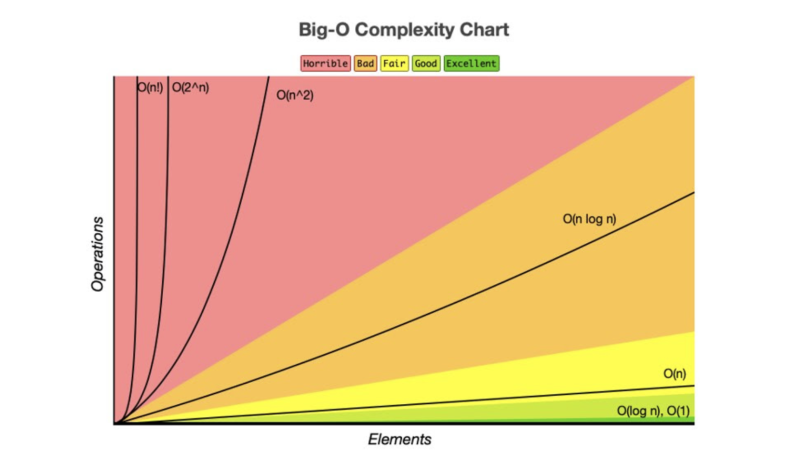

##Algorithmic Analysis

In [26]:
from operator import itemgetter

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert algorithm analyst. Please, provide an appropriate explanation of the algorithm based in the MIT knowledge",
        ),
        ("human", "Algorithm: {algorithm}, Best Case: {best_case}, Other Values: {other}"),
    ]
)

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp",temperature=0)

runnable = (
    {
        "algorithm": itemgetter("algorithm"),
        "best_case": itemgetter("best_case"),
        "other": itemgetter("other"),
    } | prompt | model | StrOutputParser()
)

In [27]:
best_case = str(best)

In [31]:
algorithm_analysis = runnable.invoke({
    "algorithm": "Quicksort algorithm in Python",
    "best_case": best_case,
    "other": other_str
})

In [36]:
!pip install -q rich

In [37]:
from rich.console import Console
from rich.markdown import Markdown

def print_md(md_content):
    """Renders and prints Markdown content using the `rich` library."""
    console = Console()
    md = Markdown(md_content)
    console.print(md)

In [38]:
print_md(algorithm_analysis)

Okay, let's break down the provided information about the Quicksort algorithm and analyze it through the lens of   
MIT's approach to algorithm analysis.                                                                              

Understanding the Context                                                                                          

The data you've provided seems to be the result of empirical testing of a Quicksort implementation in Python. It   
shows how the execution time of the algorithm scales with the input size 'n' under different scenarios. Here's a   
breakdown of what each line represents:                                                                            

 • "Best Case: Linear: time = 0.94 + 0.0003*n (sec)": This indicates that in the best-case scenario, the execution 
   time of Quicksort grows linearly with the input size 'n'. The equation time = 0.94 + 0.0003*n suggests a fixed  
   overhead of 0.94 seconds and a per-element processing time of 0.0003 seconds.                                   
 • "Other Values: Constant: time = 16 (sec)": This is a very unusual result. It suggests that for some other cases,
   the execution time is constant, regardless of the input size. This is highly unlikely for Quicksort and likely  
   indicates an issue with the testing methodology or a specific edge case being tested.                           
 • "(res: 9.2E+02), (res: 11), (res: 64), (res: 1.4E+02), (res: 34), (res: 3.7E+02), (res: 12), (res: 2.8E+03)":   
   These values are likely the results of some other tests or calculations, and their relationship to the time     
   complexities is not immediately clear. They might be the results of applying the time equations to specific     
   values of 'n'.                                                                                                  

Quicksort Algorithm: A MIT Perspective                                                                             

Here's how we analyze Quicksort from an MIT perspective, focusing on its core principles and complexities:         

 1 Divide and Conquer: Quicksort is a classic example of a divide-and-conquer algorithm. It works by:              
    • Divide: Selecting a 'pivot' element from the array and partitioning the array around this pivot. Elements    
      smaller than the pivot are placed before it, and elements larger than the pivot are placed after it.         
    • Conquer: Recursively applying the same partitioning process to the sub-arrays on either side of the pivot.   
    • Combine: The sub-arrays are already sorted by the partitioning process, so no explicit combining step is     
      needed.                                                                                                      
 2 Pivot Selection: The choice of pivot is crucial for Quicksort's performance. Common strategies include:         
    • First element: Simple but can lead to worst-case behavior on already sorted or nearly sorted data.           
    • Last element: Similar to the first element.                                                                  
    • Random element: Helps avoid worst-case scenarios in many cases.                                              
    • Median-of-three: Selects the median of the first, middle, and last elements, often providing a better pivot. 
 3 Time Complexity Analysis:                                                                                       
    • Best Case: The best case occurs when the pivot consistently divides the array into two roughly equal         
      sub-arrays. This leads to a recurrence relation of T(n) = 2T(n/2) + O(n), which solves to O(n log n). This is
      consistent with the linearithmic time complexity you have in your data.                                      
    • Average Case: On average, with a good pivot selection strategy, Quicksort also exhibits O(n log n) time      
      complexity.                                 